In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [78]:
import numpy as np
np.random.seed(0)
import seaborn as sns
sns.set()

In [9]:
page = requests.get('https://myillini.illinois.edu/Programs')
soup = BeautifulSoup(page.content, 'html.parser')
majors = soup.find('div', class_='columns-2').find_all('p')

In [10]:
baseUrl = 'https://myillini.illinois.edu/Programs/MajorDetail/'
baseSampleJob = 'https://myillini.illinois.edu/Programs/ProgramSurveyEmployers/'
baseSampleGradSchool = 'https://myillini.illinois.edu/Programs/ProgramSurveyGradSchools/'

urls = []
for major in majors:
    urls.append(list(major.children)[1]['href'].split('/')[3])

In [11]:
# print(urls)

In [12]:
# Do not arbitrarily change the order of this.
fieldsKey = [
    'Major Name',
    'Major Description',
    'College',
    'Related Majors',
    'Career Options',
    'Avg Starting Salary',
    'Sample Employer Destinations',
    'Sample Grad School Destinations',
    'Employed After Grad',
    'Attending Grad School',
    'Years To Degree',
    '4 Yr Grad Rate',
    'International Tuition',
    'Non-Resident Tuition',
    'Illinois Tuition',
    'Fees',
    'Expenses'
]

In [13]:
fieldsKey[0]

'Major Name'

In [14]:
info = pd.DataFrame(columns=fieldsKey)
# info = info.append({'Major Name': 'AA'}, ignore_index=True)
info[:]

,Major Name,Major Description,College,Related Majors,Career Options,Avg Starting Salary,Sample Employer Destinations,Sample Grad School Destinations,Employed After Grad,Attending Grad School,Years To Degree,4 Yr Grad Rate,International Tuition,Non-Resident Tuition,Illinois Tuition,Fees,Expenses


In [15]:
for majorCode in urls:
    try:
        url = baseUrl + majorCode
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        data = {}
        print(soup.find('div', class_='programItem').find('h1').get_text())

        data[fieldsKey[0]] = soup.find('div', class_='programItem').find('h1').get_text()
        data[fieldsKey[1]] = soup.find('div', class_='programDescription').find('p').get_text()
        data[fieldsKey[2]] = soup.find('div', class_='programUrls').find('a').get_text()
        data[fieldsKey[3]] = [x.find('div').find('a').get_text() for x in list(soup.find('div', class_="relatedMajors").find_all('div', class_='data-parent major-holder'))]

        money = soup.find_all('ul', class_="list-group list-group-flush tuition-list mb-4")
        data[fieldsKey[12]] = soup.find('ul', class_="list-group list-group-flush tuition-list").find('li').find_all('span')[1].get_text()
        data[fieldsKey[13]] = money[1].find('li').find_all('span')[1].get_text()
        data[fieldsKey[14]] = money[0].find('li').find_all('span')[1].get_text()
        data[fieldsKey[15]] = money[1].find_all('li')[1].find_all('span')[1].get_text()
        data[fieldsKey[16]] = money[1].find_all('li')[2].find_all('span')[1].get_text()

        numbers = soup.find_all('span', class_="number")
        data[fieldsKey[8]] = numbers[1].get_text()
        data[fieldsKey[9]] = numbers[2].get_text()
        if len(numbers) == 8:
            data[fieldsKey[5]] = numbers[3].get_text() 
            data[fieldsKey[10]] = numbers[4].get_text() 
            data[fieldsKey[11]] = numbers[6].get_text()
        elif len(numbers) == 9:
            data[fieldsKey[5]] = numbers[4].get_text() 
            data[fieldsKey[10]] = numbers[5].get_text() 
            data[fieldsKey[11]] = numbers[7].get_text()
        elif len(numbers) == 6:
            data[fieldsKey[5]] = numbers[3].get_text() 
            data[fieldsKey[10]] = numbers[4].get_text() 
            data[fieldsKey[11]] = numbers[7].get_text()
        elif len(numbers) == 4:
            data[fieldsKey[5]] = NaN
            data[fieldsKey[10]] = numbers[0].get_text() 
            data[fieldsKey[11]] = numbers[2].get_text()

        sampleJobs = baseSampleJob + majorCode
        sampleGradSchool = baseSampleGradSchool + majorCode
        res2 = requests.get(sampleJobs)
        res3 = requests.get(sampleGradSchool)
        soup2 = BeautifulSoup(res2.content, 'html.parser')
        soup3 = BeautifulSoup(res3.content, 'html.parser')
        all2 = soup2.find_all('li')
        all3 = soup3.find_all('li')
        data[fieldsKey[6]] = [x.get_text() for x in all2]
        data[fieldsKey[7]] = [x.get_text() for x in all3]
        
        data[fieldsKey[4]] = [x.get_text() for x in list(soup.find('div', class_="programCareerExamples").find_all('li'))]
    except:
        print('Error!')
    finally:
        info = info.append(data, ignore_index=True)

Accountancy
ACES Undeclared
Error!
Acting
Actuarial Science
Advertising
Aerospace Engineering
African American Studies
Agri-Accounting
Agribusiness, Markets & Management
Agricultural and Biological Engineering
Ag & Bio Engineering
Agricultural and Consumer Economics
Agricultural Communications - Advertising
Agricultural Communications - Journalism
Agricultural Education
Agricultural Leadership, Education, and Communications
Error!
Animal Sciences
Anthropology
Architectural Studies
Art and Art History 
Art Education (K-12)
Arts and Entertainment Technology 
Error!
Asian American Studies
Astronomy
Atmospheric Sciences
Biochemistry
Bioengineering
Biology
Error!
Brain and Cognitive Science
Error!
Chemical Engineering
Chemistry
Civil Engineering
Classics
Error!
Communication
Community Health
Comparative and World Literature
Computer Engineering
Computer Science
Computer Science and Advertising
Error!
Computer Science and Animal Sciences
Error!
Computer Science and Anthropology
Error!
Comput

In [17]:
# For the companies that hire the most, draw a pie chart to show comparatively how much they employ from each college (eg - Engineering).
# Given any unseen major, use the text to rank the level of match to majors in my dataset, then use regression to predict average salary and chance of employment.

# Use webscraping of other articles and print charts showing which majors are growing the fastest in job growth and salary growth.
# Draw graphs of majors by salary range and graphs of employers by the majors they hire for. (graphs similar to dagre)

In [21]:
info = info.dropna()

In [67]:
contCols = [fieldsKey[5], fieldsKey[8], fieldsKey[9], fieldsKey[10], fieldsKey[11], fieldsKey[12], fieldsKey[13], fieldsKey[14]]
contData = pd.DataFrame(columns=contCols)

In [68]:
contData[fieldsKey[5]] = info[fieldsKey[5]]
contData[fieldsKey[8]] = info[fieldsKey[8]]
contData[fieldsKey[9]] = info[fieldsKey[9]]
contData[fieldsKey[10]] = info[fieldsKey[10]]
contData[fieldsKey[11]] = info[fieldsKey[11]]
contData[fieldsKey[12]] = info[fieldsKey[12]]
contData[fieldsKey[13]] = info[fieldsKey[13]]
contData[fieldsKey[14]] = info[fieldsKey[14]]

In [69]:
contData

,Avg Starting Salary,Employed After Grad,Attending Grad School,Years To Degree,4 Yr Grad Rate,International Tuition,Non-Resident Tuition,Illinois Tuition
0,"$62,142",40%,57%,3.7,83%,"$37,876","$34,798","$17,348"
2,"$50,503",56%,31%,4.0,60%,"$32,198","$31,308","$13,858"
3,"$61,563",69%,16%,3.8,85%,"$32,094","$29,704","$12,254"
4,"$43,041",84%,5%,3.8,80%,"$31,374","$30,484","$13,034"
5,"$65,361",62%,26%,4.1,66%,"$40,146","$34,798","$17,348"
...,...,...,...,...,...,...,...,...
158,"$63,420",95%,4%,3.7,83%,"$37,876","$34,798","$17,348"
160,"$65,116",80%,10%,4.4,66%,"$40,146","$34,798","$17,348"
165,"$54,600",79%,7%,4.1,74%,"$33,180","$32,290","$14,840"
166,"$50,503",56%,31%,4.0,60%,"$32,198","$31,308","$13,858"


In [70]:
contData[fieldsKey[8]] = [int(str(x)[:-1]) for x in contData[fieldsKey[8]]]
contData[fieldsKey[9]] = [int(str(x)[:-1]) for x in contData[fieldsKey[9]]]
contData[fieldsKey[11]] = [int(str(x)[:-1]) for x in contData[fieldsKey[11]]]

In [71]:
contData[fieldsKey[5]] = [int(str(x)[1:3] + str(x[4:])) for x in contData[fieldsKey[5]]]
contData[fieldsKey[12]] = [int(str(x)[1:3] + str(x[4:])) for x in contData[fieldsKey[12]]]
contData[fieldsKey[13]] = [int(str(x)[1:3] + str(x[4:])) for x in contData[fieldsKey[13]]]
contData[fieldsKey[14]] = [int(str(x)[1:3] + str(x[4:])) for x in contData[fieldsKey[14]]]

In [73]:
contData[fieldsKey[10]] = [float(x) for x in contData[fieldsKey[10]]]

In [74]:
contData

,Avg Starting Salary,Employed After Grad,Attending Grad School,Years To Degree,4 Yr Grad Rate,International Tuition,Non-Resident Tuition,Illinois Tuition
0,62142,40,57,3.7,83,37876,34798,17348
2,50503,56,31,4.0,60,32198,31308,13858
3,61563,69,16,3.8,85,32094,29704,12254
4,43041,84,5,3.8,80,31374,30484,13034
5,65361,62,26,4.1,66,40146,34798,17348
...,...,...,...,...,...,...,...,...
158,63420,95,4,3.7,83,37876,34798,17348
160,65116,80,10,4.4,66,40146,34798,17348
165,54600,79,7,4.1,74,33180,32290,14840
166,50503,56,31,4.0,60,32198,31308,13858


In [76]:
corr = contData.corr()

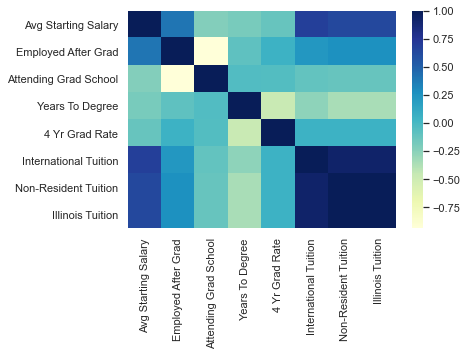

In [79]:
ax = sns.heatmap(corr, cmap="YlGnBu")